In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/cheryl-kdio/Repositories/cherry-stats/articles/GDR':
  os.chdir(r'/home/cheryl-kdio/Repositories/cherry-stats/articles/GDR')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_12293/1847171805.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1700493245.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1700493245.0, "/usr/lib/python3.10/codecs.py": 1700493245.0, "/usr/lib/python3.10/encodings/aliases.py": 1700493245.0, "/usr/lib/python3.10/encodings/__init__.py": 1700493245.0, "/usr/lib/python3.10/encodings/utf_8.py": 1700493245.0, "/usr/lib/python3.10/abc.py": 1700493245.0, "/usr/lib/python3.10/io.py": 1700493245.0, "/usr/lib/python3.10/stat.py": 1700493245.0, "/usr/lib/python3.10/_collections_abc.py": 1700493245.0, "/usr/lib/python3.10/genericpath.py": 1700493245.0, "/usr/lib/python3.10/posixpath.py": 1700493245.0, "/usr/lib/python3.10/os.py": 1700493245.0, "/usr/lib/python3.10/_sitebuiltins.py": 1700493245.0, "/usr/lib/python3.10/sitecustomize.py": 1648890259.0, "/usr/lib/python3.10/site.py": 1700493245.0, "/usr/lib/python3.10/warnings.py": 1700493245.0, "/usr/lib/python3.10/importlib/__init__.py": 1700493245.0, "/usr/lib/python3.10/importlib/machinery.py": 1700493

In [2]:
# Librairie où importer les données
import yfinance as yf
_ = yf.Ticker("^FCHI")
ts_data = _.history("max")
ts_data.index = ts_data.index.strftime('%Y-%m-%d')
ts_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [3]:
import warnings
warnings.filterwarnings('ignore')
ts_data = ts_data[[ 'Close']]
import pandas as pd
import numpy as np


ts_data['Return'] = ts_data["Close"].pct_change()
ts_data = ts_data.dropna(subset=['Return'])
print(ts_data.head())

             Close    Return
Date                        
1990-03-02  1860.0  0.015284
1990-03-05  1874.0  0.007527
1990-03-06  1872.0 -0.001067
1990-03-07  1880.0  0.004274
1990-03-08  1917.0  0.019681


<Figure size 576x384 with 0 Axes>

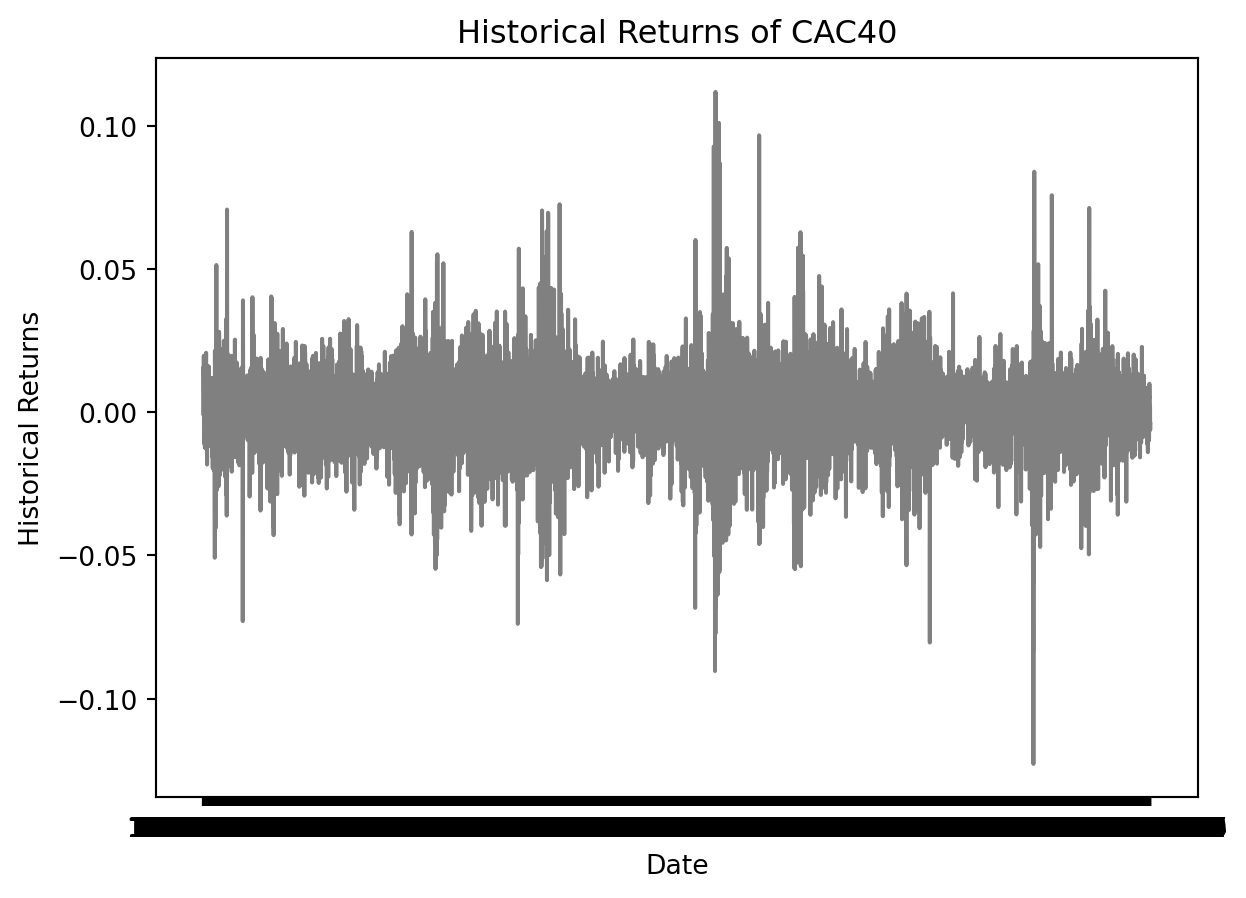

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

fig, ax = plt.subplots(1)

ax.set_xlabel('Date')
ax.set_ylabel('Historical Returns')
ax.plot(ts_data.index, ts_data['Return'], color='grey')
ax.tick_params(axis='y')

plt.title('Historical Returns of CAC40')
plt.show()

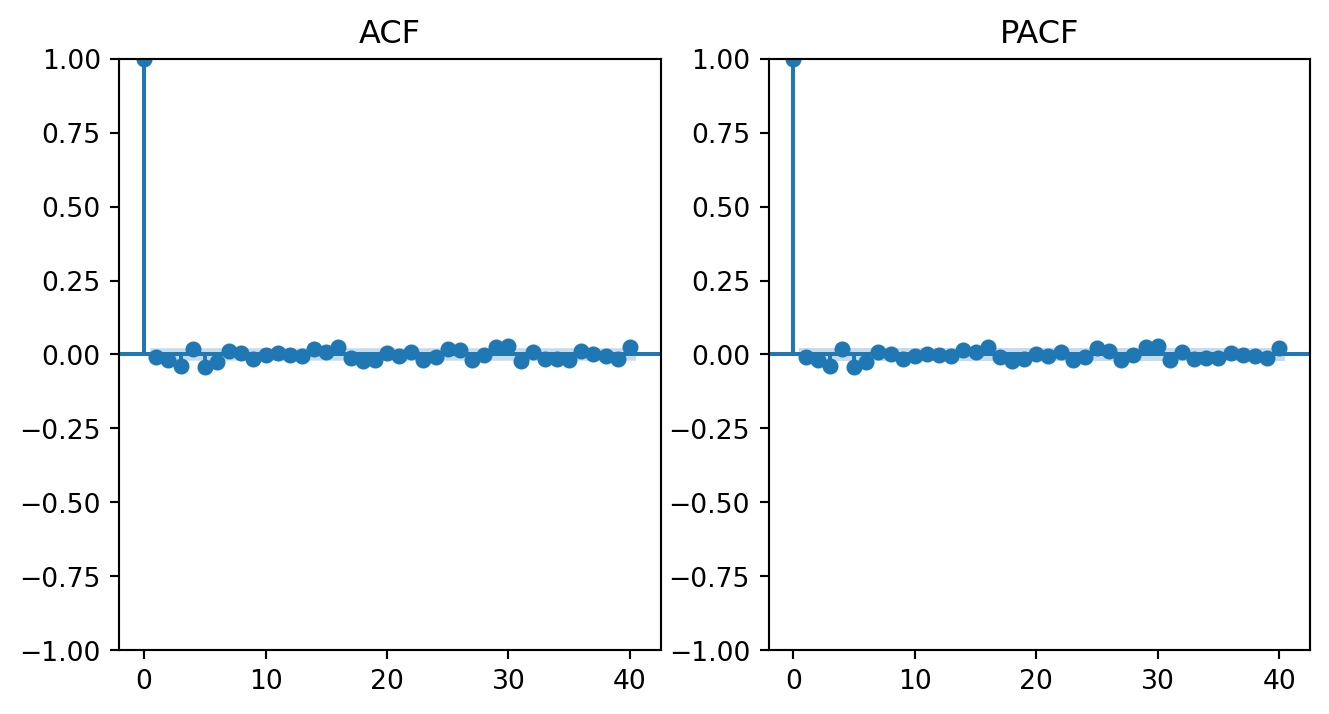

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(8, 4))
plot_acf(ts_data['Return'].dropna(), ax=ax[0],title='ACF')
plot_pacf(ts_data['Return'].dropna(), ax=ax[1],title='PACF')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts_data['Return'].dropna(), regression='c')
print(f"ADF Statistic: {round(adf_result[0],2)} and p-value: {adf_result[1]}")

ADF Statistic: -41.06 and p-value: 0.0


In [7]:
train_size = int(len(ts_data)*0.75)
test_size = len(ts_data)-train_size

train_close = ts_data.iloc[0:train_size,:].dropna()
test_close = ts_data.iloc[train_size:len(ts_data),:]
print("Taille de l'ensemble d'apprentissage :", len(train_close))
print("Taille de l'ensemble de test :", len(test_close))

Taille de l'ensemble d'apprentissage : 6513
Taille de l'ensemble de test : 2172


In [8]:
from scipy import stats
def gaussian_var(PnL, seuil):
    mean_PnL = np.mean(PnL)
    sd_PnL = np.std(PnL)
    VaR = - mean_PnL + sd_PnL * stats.norm.ppf(seuil)
    return VaR

seuil = 0.99
prices= train_close["Close"].iloc[-1]*(1+train_close["Return"])
train_close["PnL"] = prices - train_close["Close"].iloc[-1]


VaR_gaussienne = gaussian_var(train_close["PnL"], seuil)

print(f"La VaR à horizon 1 jour est de {round(VaR_gaussienne, 4)}")

La VaR à horizon 1 jour est de 159.2839


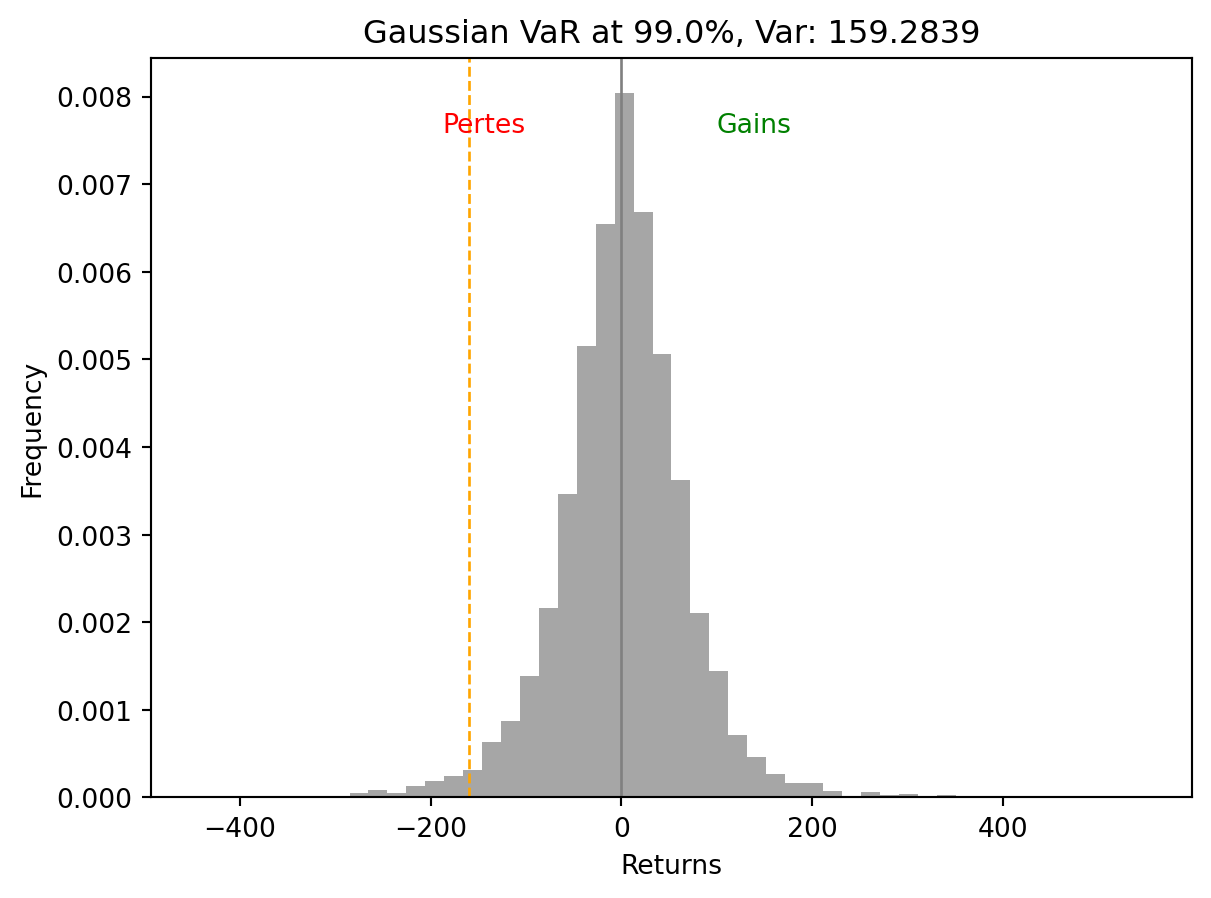

In [9]:
# Plot histogram of returns
plt.hist(train_close["PnL"], bins=50, density=True, alpha=0.7,color="grey")

# Plot VaR line
plt.axvline(x=-VaR_gaussienne, color="orange", linestyle="--", linewidth=1)
plt.axvline(x=0, color="grey",  linewidth=1)

# Add text for Loss and Gain
plt.text(-100, plt.ylim()[1] * 0.9, 'Pertes', horizontalalignment='right', color='red')
plt.text(100, plt.ylim()[1] * 0.9, 'Gains', horizontalalignment='left', color='green')


# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Gaussian VaR at {seuil * 100}%, Var: {VaR_gaussienne:.4f}")

# Show the plot
plt.show()

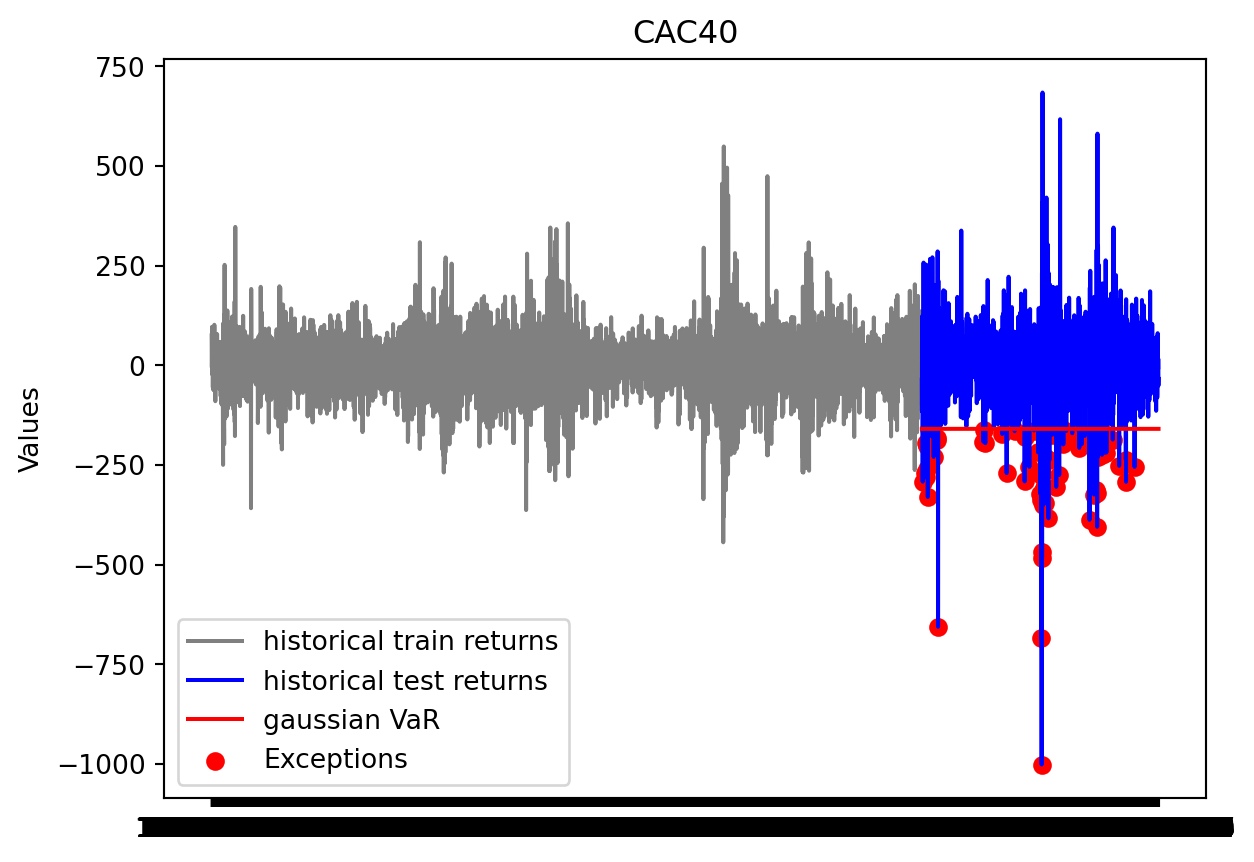

In [10]:
prices= test_close["Close"].iloc[-1]*(1+test_close["Return"])
test_close["PnL"] = prices - test_close["Close"].iloc[-1] 

plt.plot(ts_data.index[0:train_size], train_close['PnL'], label="historical train returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['PnL'], label="historical test returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_gaussienne for i in range(test_size)], label="gaussian VaR", color = 'red')
list_exceptions_gaus = [i for i in range(len(test_close['PnL'])) if test_close['PnL'][i]<-VaR_gaussienne]
plt.scatter(test_close.index[list_exceptions_gaus], test_close['PnL'][list_exceptions_gaus], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

In [11]:
round((len(list_exceptions_gaus)/test_size)*100,2) 

3.5

In [12]:
num_simulations = 1000
tboot = np.zeros(num_simulations)

for i in range(num_simulations):
  sample = np.random.choice(test_close["PnL"], test_size, replace=True)
  p0=1-seuil
  n=len(sample)
  variance=p0*(1-p0)/n
  list_exceptions=[i for i in range(n) if sample[i]<-VaR_gaussienne]

  p=(len(list_exceptions)/n)
  tboot[i]=(p-p0)/np.sqrt(variance)

t = np.mean(tboot)

lower_bound = np.percentile(tboot,100*(1-seuil)/2)
upper_bound = np.percentile(tboot,100*(1-(1-seuil)/2))
IC = (lower_bound, upper_bound)
print(t)
pvaleur=1-stats.norm.cdf(t)
print(pvaleur)
print(IC)

stats.binomtest(len(list_exceptions_gaus), test_size, p = 0.01).pvalue

11.685292419612775
0.0
(7.391455314698038, 16.882278025124318)


5.489501863236273e-20

In [13]:
def historical_var(PnL, seuil):
    return -np.percentile(PnL, (1 - seuil) * 100)

prices= train_close["Close"].iloc[-1]*(1+train_close["Return"])
PnL = prices - train_close["Close"].iloc[-1]

VaR_historique = historical_var(PnL,seuil)
round(VaR_historique,4)

194.5946

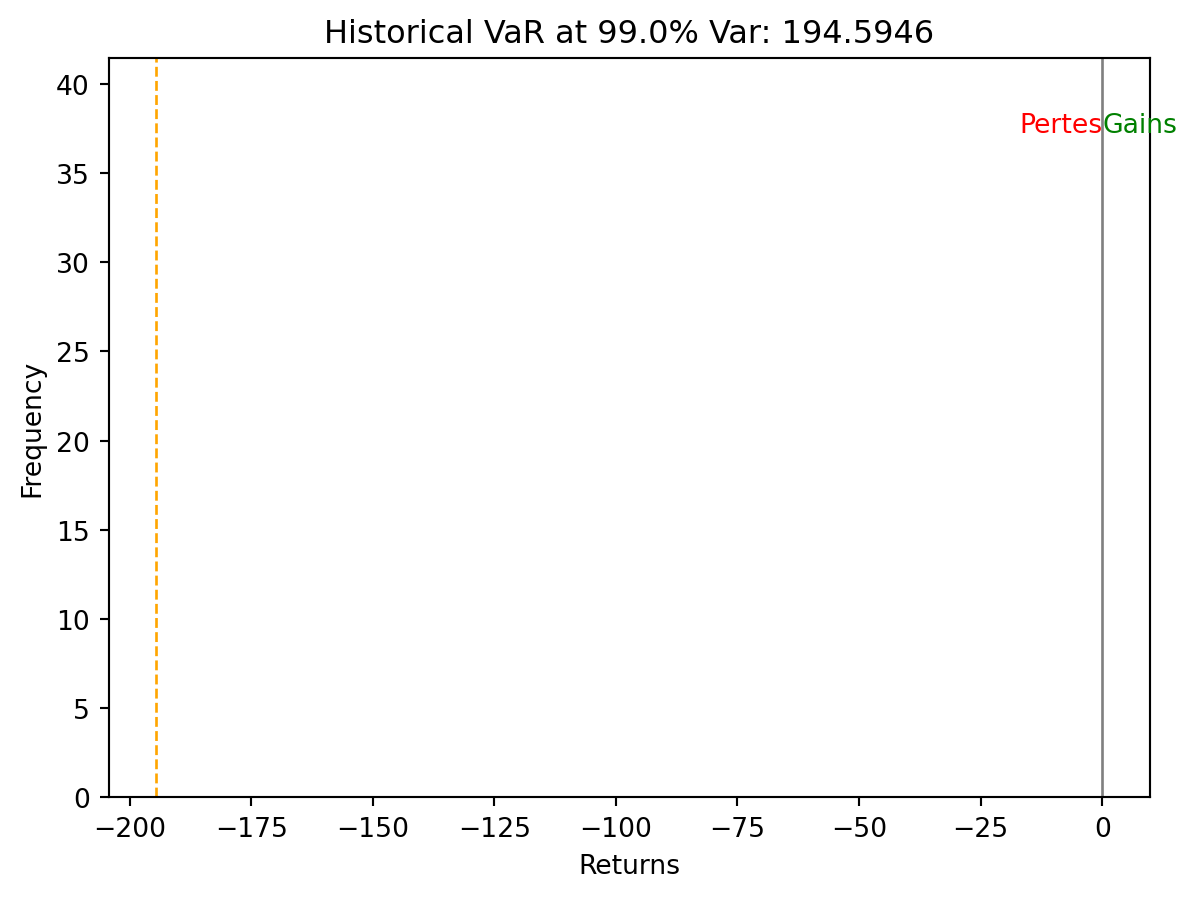

In [14]:
# Plot histogram of returns
plt.hist(train_close["Return"], bins=50, density=True, alpha=0.7,color="grey")

# Plot VaR line
plt.axvline(x=-VaR_historique, color="orange", linestyle="--", linewidth=1)
plt.axvline(x=0, color="grey",  linewidth=1)
# Add text for Loss and Gain
plt.text(- 0.01, plt.ylim()[1] * 0.9, 'Pertes', horizontalalignment='right', color='red')
plt.text(0.01, plt.ylim()[1] * 0.9, 'Gains', horizontalalignment='left', color='green')


# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Historical VaR at {seuil * 100}% Var: {VaR_historique:.4f}")

# Show the plot
plt.show()

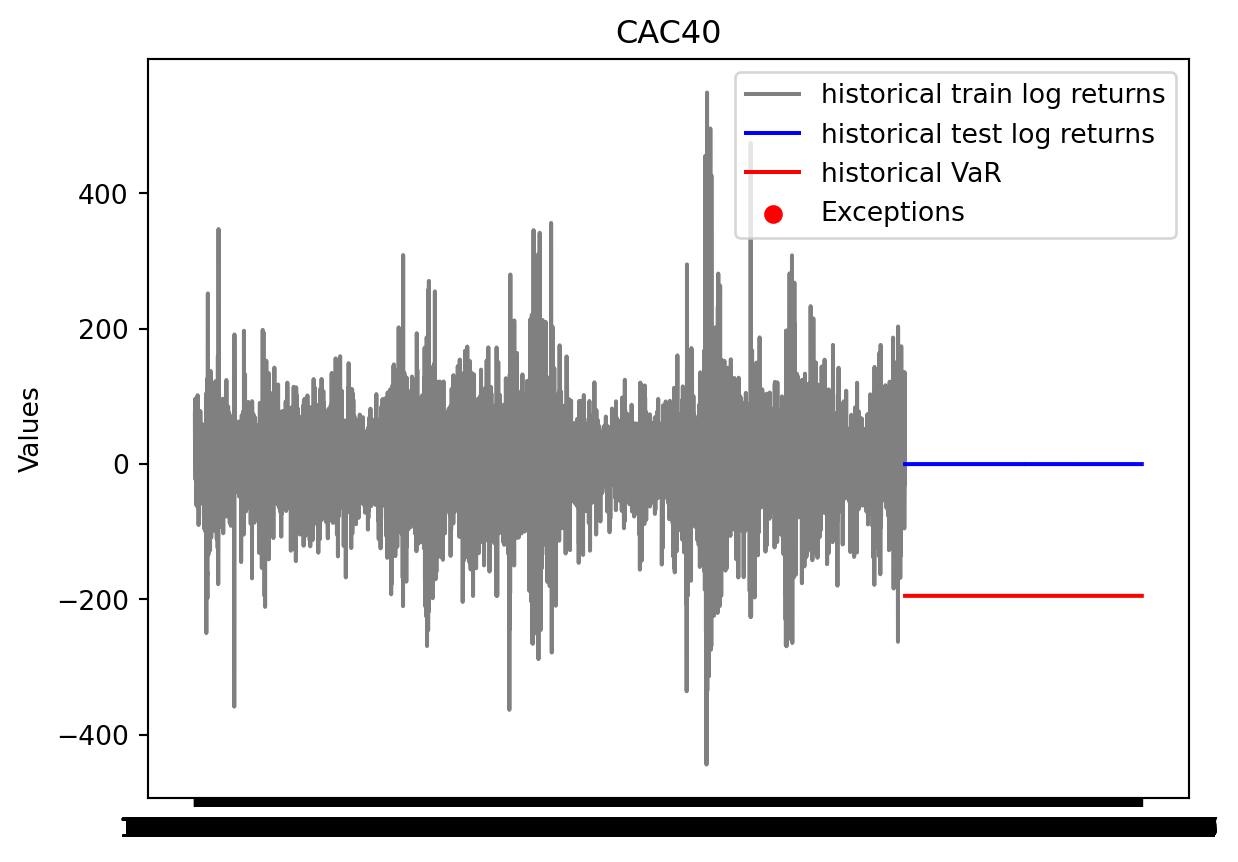

In [15]:
import matplotlib.pyplot as plt
plt.plot(ts_data.index[0:train_size], train_close['PnL'], label="historical train log returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['Return'], label="historical test log returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_historique for i in range(test_size)], label="historical VaR", color = 'red')
list_exceptions_hist = [i for i in range(len(test_close['Return'])) if test_close['Return'][i]<-VaR_historique]
plt.scatter(test_close.index[list_exceptions_hist], test_close['Return'][list_exceptions_hist], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

In [16]:
round((len(list_exceptions_hist)/test_size)*100,2) 
p0=1-seuil
variance=p0*(1-p0)/test_size
p=(len(list_exceptions_hist)/test_size)

t=(p-p0)/np.sqrt(variance)
pvaleur=1-stats.norm.cdf(t)
pvaleur

0.9999985930112507

In [17]:
def monte_carlo_var(Close,Return,seuil, num_simulations):
  mean = np.mean(Return)
  std = np.std(Return)
  # Generate random scenarios of future returns
  simulated_returns = np.random.normal(mean, std, size=num_simulations)
  simulated_prices = Close.iloc[-1] * (1+simulated_returns)
  simulated_pnl = simulated_prices - Close.iloc[-1]

  # Calculate portfolio values for each scenario
    
  return historical_var(simulated_pnl,seuil)

def bootstrap_var(PnL, seuil, num_simulations, alpha_IC, B):
    VaRs_boot = np.zeros(num_simulations)

    for i in range(num_simulations):
        sample = np.random.choice(PnL, B, replace=True)
        VaRs_boot[i] = historical_var(sample, seuil)

    VaR = np.mean(VaRs_boot)

    lower_bound = np.percentile(VaRs_boot, 100 * (1-alpha_IC) / 2)
    upper_bound = np.percentile(VaRs_boot, 100 * (1 - (1-alpha_IC) / 2))
    IC = (lower_bound, upper_bound)

    return VaR, IC

VaR_boostrap, IC = bootstrap_var(train_close["Return"], seuil, 5000, 0.95, train_size)
VaR_boostrap
VaR_monte_carlo = monte_carlo_var(train_close["Close"],train_close["Return"], seuil, 100)
VaR_monte_carlo

161.63893367324007

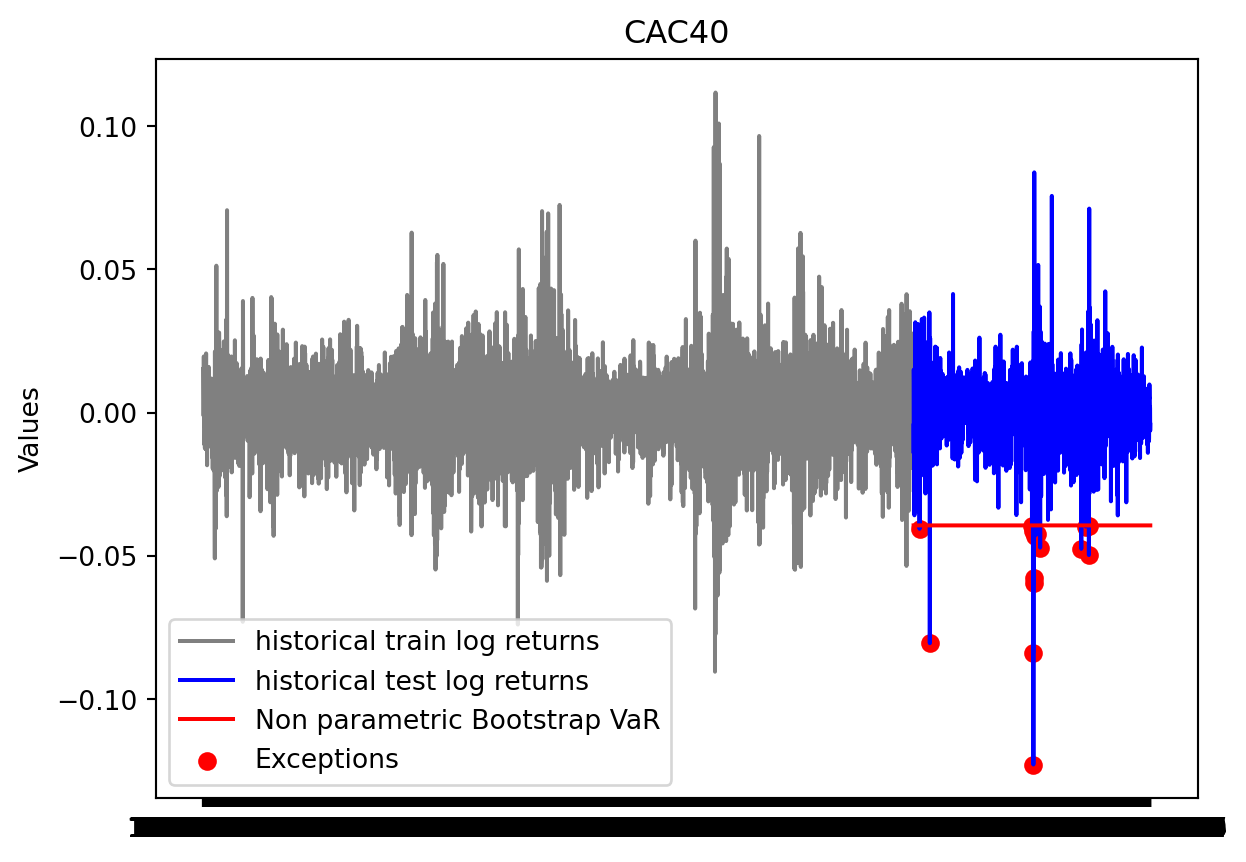

In [18]:
plt.plot(ts_data.index[0:train_size], train_close['Return'], label="historical train log returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['Return'], label="historical test log returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_boostrap for i in range(test_size)], label="Non parametric Bootstrap VaR", color = 'red')
list_exceptions_np_boot = [i for i in range(len(test_close['Return'])) if test_close['Return'][i]<-VaR_boostrap]
plt.scatter(test_close.index[list_exceptions_np_boot], test_close['Return'][list_exceptions_np_boot], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()